In [1]:
submit_count = 1

In [285]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


train = pd.read_csv("bike_sharing/train.csv")
test = pd.read_csv("bike_sharing/test.csv")

In [286]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [287]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [288]:
train["datetime"] = pd.to_datetime(train["datetime"])

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek

train = train.drop(columns=["datetime", "month", "day", "minute", "second"])

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,5


In [289]:
test["datetime"] = pd.to_datetime(test["datetime"])

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek

test = test.drop(columns=["datetime", "month", "day", "minute", "second"])

test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [290]:
import math

print (train[train["windspeed"] ==0.0].shape)
for season in range(1, 5):
    for weather in range(1, 5):
        for hour in range(0, 24):
            for year in range(2011, 2013):
                mean_speed = train[(train["season"] == season) & (train["windspeed"] !=0) & (train["weather"] == weather) & (train["hour"] == hour) & (train["year"] == year)]["windspeed"].mean()
                if math.isnan(mean_speed):
                    mean_speed = 0.0
                train.loc[(train["season"] == season) & (train["windspeed"] ==0.0) & (train["weather"] == weather) & (train["hour"] == hour) & (train["year"] == year), ["windspeed"]] = mean_speed
print (train[train["windspeed"] ==0.0].shape)

(1313, 14)
(0, 14)


In [291]:
print (test[test["windspeed"] ==0.0].shape)
for season in range(1, 5):
    for weather in range(1, 5):
        for hour in range(0, 24):
            for year in range(2011, 2013):
                mean_speed = test[(test["season"] == season) & (test["windspeed"] !=0) & (test["weather"] == weather) & (test["hour"] == hour) & (test["year"] == year)]["windspeed"].mean()
                if math.isnan(mean_speed):
                    mean_speed = 0.0
                test.loc[(test["season"] == season) & (test["windspeed"] ==0.0) & (test["weather"] == weather) & (test["hour"] == hour) & (test["year"] == year), ["windspeed"]] = mean_speed
print (test[test["windspeed"] ==0.0].shape)

(867, 11)
(2, 11)


## Hot Encoding

#### weather, season

In [292]:
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)
train = train.drop(columns=["season"])

weather=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,weather],axis=1)
train = train.drop(columns=["weather"])
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,16.173107,3,13,16,2011,0,5,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,16.871465,8,32,40,2011,1,5,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,16.538950,5,27,32,2011,2,5,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,15.818395,3,10,13,2011,3,5,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,16.653881,0,1,1,2011,4,5,1,0,0,0,1,0,0,0


In [293]:
season=pd.get_dummies(test['season'],prefix='season')
test=pd.concat([test,season],axis=1)
test = test.drop(columns=["season"])
test.head()

weather=pd.get_dummies(test['weather'],prefix='weather')
test=pd.concat([test,weather],axis=1)
test = test.drop(columns=["weather"])
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,11.365,56,26.002700,2011,0,3,1,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,13.176535,2011,1,3,1,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,12.941247,2011,2,3,1,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.001400,2011,3,3,1,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.001400,2011,4,3,1,0,0,0,1,0,0,0


### Year Encoding (2011:0, 2012:1)

In [294]:
train['year'] = train['year'].map({2011:0, 2012:1})
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,16.173107,3,13,16,0,0,5,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,16.871465,8,32,40,0,1,5,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,16.538950,5,27,32,0,2,5,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,15.818395,3,10,13,0,3,5,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,16.653881,0,1,1,0,4,5,1,0,0,0,1,0,0,0


In [295]:
test['year'] = test['year'].map({2011:0, 2012:1})
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,11.365,56,26.002700,0,0,3,1,0,0,0,1,0,0,0
1,0,1,10.66,13.635,56,13.176535,0,1,3,1,0,0,0,1,0,0,0
2,0,1,10.66,13.635,56,12.941247,0,2,3,1,0,0,0,1,0,0,0
3,0,1,10.66,12.880,56,11.001400,0,3,3,1,0,0,0,1,0,0,0
4,0,1,10.66,12.880,56,11.001400,0,4,3,1,0,0,0,1,0,0,0


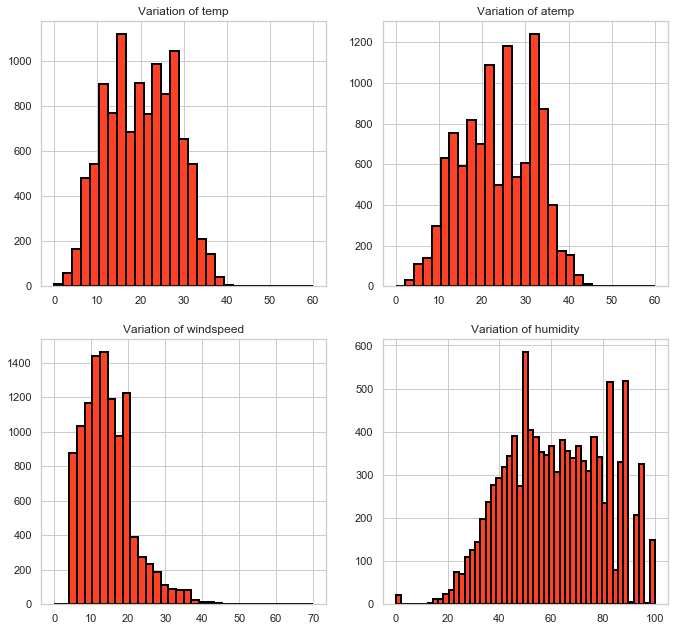

In [296]:
# can also be visulaized using histograms for all the continuous variables.
fig,axes=plt.subplots(2,2)
bins = np.linspace(0, 60, 30)
axes[0,0].hist(x="temp",data=train,edgecolor="black",linewidth=2,color='#ff4125',bins=bins)
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=train,edgecolor="black",linewidth=2,color='#ff4125',bins=bins)
axes[0,1].set_title("Variation of atemp")
bins = np.linspace(0, 70, 35)
axes[1,0].hist(x="windspeed",data=train,edgecolor="black",linewidth=2,color='#ff4125',bins=bins)
axes[1,0].set_title("Variation of windspeed")
bins = np.linspace(0, 100, 50)
axes[1,1].hist(x="humidity",data=train,edgecolor="black",linewidth=2,color='#ff4125',bins=bins)
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

In [297]:
valid = 4

train['temp_bin']=np.floor(train['temp'])//valid
train['atemp_bin']=np.floor(train['atemp'])//valid
train['windspeed_bin']=np.floor(train['windspeed'])//valid
train['humidity_bin']=np.floor(train['humidity'])//valid

train = train.drop(columns=["temp", "atemp", "windspeed", "humidity"])
train.head()

,holiday,workingday,casual,registered,count,year,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,temp_bin,atemp_bin,windspeed_bin,humidity_bin
0,0,0,3,13,16,0,0,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,20.0
1,0,0,8,32,40,0,1,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,20.0
2,0,0,5,27,32,0,2,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,20.0
3,0,0,3,10,13,0,3,5,1,0,0,0,1,0,0,0,2.0,3.0,3.0,18.0
4,0,0,0,1,1,0,4,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,18.0


In [298]:
test['temp_bin']=np.floor(test['temp'])//valid
test['atemp_bin']=np.floor(test['atemp'])//valid
test['windspeed_bin']=np.floor(test['windspeed'])//valid
test['humidity_bin']=np.floor(test['humidity'])//valid

test = test.drop(columns=["temp", "atemp", "windspeed", "humidity"])
test.head()

,holiday,workingday,year,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,temp_bin,atemp_bin,windspeed_bin,humidity_bin
0,0,1,0,0,3,1,0,0,0,1,0,0,0,2.0,2.0,6.0,14.0
1,0,1,0,1,3,1,0,0,0,1,0,0,0,2.0,3.0,3.0,14.0
2,0,1,0,2,3,1,0,0,0,1,0,0,0,2.0,3.0,3.0,14.0
3,0,1,0,3,3,1,0,0,0,1,0,0,0,2.0,3.0,2.0,14.0
4,0,1,0,4,3,1,0,0,0,1,0,0,0,2.0,3.0,2.0,14.0


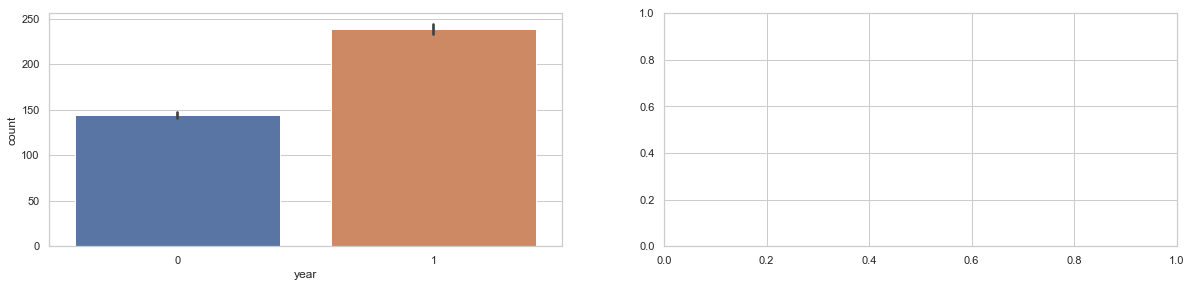

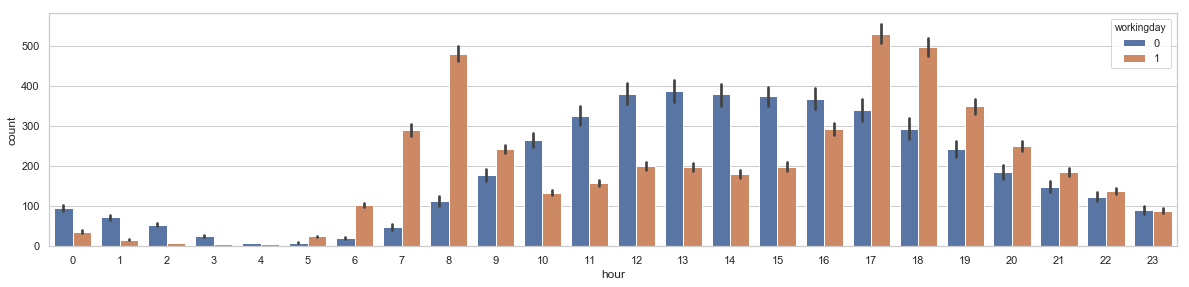

In [299]:
# matplotlib의 subplots를 사용합니다. 이 함수는 여러 개의 시각화를 한 화면에 띄울 수 있도록 합니다.
# 이번에는 1x2로 총 2개의 시각화를 한 화면에 띄웁니다.
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# seaborn의 barplot으로 subplots의 각 구역에
# 연, 월별 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="year", y="count", ax=ax1)
# sns.barplot(data=train, x="month", y="count", hue="year", ax=ax2)

# 다시 한 번 matplotlib의 subplots를 사용합니다.
# 이번에는 1x1로 1개의 시각화만을 출력합니다.
figure, ax3 = plt.subplots(nrows=1, ncols=1)

# 이 시각화의 전체 사이즈는 18x4로 설정합니다.
figure.set_size_inches(18, 4)

# 이번에는 seaborn의 barplot으로 연-월을 붙여서 자전거 대여량을 출력합니다.
sns.barplot(data=train, x="hour", y="count", hue="workingday",ax=ax3)

In [303]:
train_x = train.drop(columns=["count", "casual", "registered"])
train_x.head()

,holiday,workingday,year,hour,dayofweek,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,temp_bin,atemp_bin,windspeed_bin,humidity_bin
0,0,0,0,0,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,20.0
1,0,0,0,1,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,20.0
2,0,0,0,2,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,20.0
3,0,0,0,3,5,1,0,0,0,1,0,0,0,2.0,3.0,3.0,18.0
4,0,0,0,4,5,1,0,0,0,1,0,0,0,2.0,3.0,4.0,18.0


In [304]:
train_y_c = train["casual"]
train_y_c.head()

0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [305]:
train_y_r = train["registered"]
train_y_r.head()

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [306]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=8133)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=8133, verbose=0, warm_start=False)

In [307]:
# scikit-learn 패키지의 metrics 모듈에서 make_scorer라는 함수를 가지고 옵니다.
# 이 함수는 파이썬을 구현한 측정 공식을 scikit-learn에서 사용할 수 있도록 변환해 줍니다.
from sklearn.metrics import make_scorer

# RMSLE 공식을 구현한 함수를 생성합니다.
# 이 함수는 예측값(predict)과 정답(actual)을 인자로 받습니다.
def rmsle(predict, actual):
    # predict와 actual을 numpy array로 변환합니다.
    # 이렇게 하면 수학 연산을 편하게 할 수 있습니다.
    predict = np.array(predict)
    actual = np.array(actual)
    
    # 공식에 쓰여진대로 predict와 actual에 log(count + 1)을 합니다.
    # 이 결과를 각각 log_predict와 log_actual에 대입합니다.
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    # 공식에 쓰여진대로 log_predict와 log_actual을 빼서 차이를 구합니다.
    # 이 차이를 distance라는 이름의 새로운 변수에 할당합니다.
    distance = log_predict - log_actual
    
    # 공식에 쓰여진대로 distance를 제곱합니다.
    # 이 결과를 square_distance라는 이름의 새로운 변수에 할당합니다.
    square_distance = distance ** 2
    
    # 공식에 쓰여진대로 square_distance의 평균을 구합니다.
    # 이 결과를 mean_square_distance라는 이름의 새로운 변수에 할당합니다.
    mean_square_distance = square_distance.mean()
    
    # 공식에 쓰여진대로 mean_square_distance에 루트(sqrt)를 씌웁니다.
    # 이 결과를 score라는 이름의 새로운 변수에 할당합니다.
    score = np.sqrt(mean_square_distance)
    
    # score 변수를 반환합니다.
    return score

# scikit-learn의 make_scorer를 활용하여
# rmsle 함수를 scikit-learn의 다른 함수에서 사용할 수 있도록 변환합니다.
# 이 결과를 rmsle_score라는 이름의 새로운 변수에 할당합니다.
rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [308]:
# scikit-learn의 model_selection 모듈에서 cross_val_score 함수를 가져옵니다.
# 이 함수는 Cross Validation의 모든 기능을 한 번에 실행합니다.
from sklearn.model_selection import cross_val_score

# cross_val_score를 실행합니다. 실행할 때는 다음의 옵션이 들어갑니다.
# 1) model. 점수를 측정할 머신러닝 모델(현재는 Random Forest)이 들어갑니다.
# 2) X_train. train 데이터의 feature 입니다.
# 3) y_train. train 데이터의 label 입니다.
# 4) cv. Cross Validation에서 데이터를 조각낼(split) 갯수입니다. 총 20조각을 내야하기 때문에 20을 대입합니다.
# 5) scoring. 점수를 측정할 공식입니다. 앞서 구현한 RMSLE를 적용합니다.
# 마지막으로, 이 함수의 실행 결과의 평균(mean)을 구한 뒤 score라는 이름의 새로운 변수에 할당합니다.
score = cross_val_score(model, train_x, train_y_c,
                        cv=20, scoring=rmsle_score).mean()

# score 변수에 할당한 점수를 출력합니다.
print("Score = {0:.5f}".format(score))

score = cross_val_score(model, train_x, train_y_r,
                        cv=20, scoring=rmsle_score).mean()

# score 변수에 할당한 점수를 출력합니다.
print("Score = {0:.5f}".format(score))

Score = 0.62681
Score = 0.36999


In [310]:
model.fit(train_x, train_y_c)
predictions_c = model.predict(test)
print(predictions_c.shape)
predictions_c

(6493,)


array([2.5, 0.3, 1.2, ..., 4.1, 4. , 2.5])

In [311]:
model.fit(train_x, train_y_r)
predictions_r = model.predict(test)
print(predictions_r.shape)
predictions_r

(6493,)


array([ 8.4,  5.4,  1.8, ..., 97.3, 86.5, 46.4])

In [312]:
submission = pd.read_csv("bike_sharing/sampleSubmission.csv")

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [313]:
submission["count"] = predictions_c + predictions_r

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,10.9
1,2011-01-20 01:00:00,5.7
2,2011-01-20 02:00:00,3.0
3,2011-01-20 03:00:00,2.4
4,2011-01-20 04:00:00,2.4


In [314]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("bike_sharing/submit_{}.csv".format(submit_count), index=False)
submit_count += 1

In [315]:
submit_count

4